In [1]:
# age & estimated salary - dependent var. -> purchased or not
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2]:
# logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[50  2]
 [ 9 19]]
0.8625


/var/folders/kv/fvbwb5yj4_751vw_l_kg15qm0000gn/T/ipykernel_14059/3687513941.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


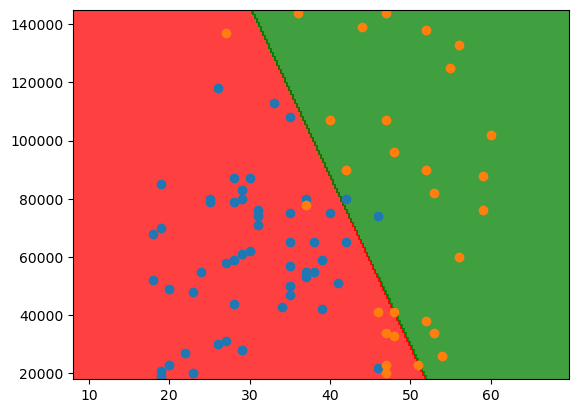

In [3]:
# observation points, prediction regions, prediction boundary
# test
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10,
                               stop=X_set[:, 0].max() + 10, step=0.25),
                    np.arange(start=X_set[:, 1].min() - 1000,
                               stop=X_set[:, 1].max() + 1000, step=0.25))
plt.contourf(X1, X2, 
             classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
               cmap=ListedColormap(('red', 'green'))(i), label=j)

In [4]:
# k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # euclidean
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[48  4]
 [ 3 25]]
0.9125


/var/folders/kv/fvbwb5yj4_751vw_l_kg15qm0000gn/T/ipykernel_14059/3744325120.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


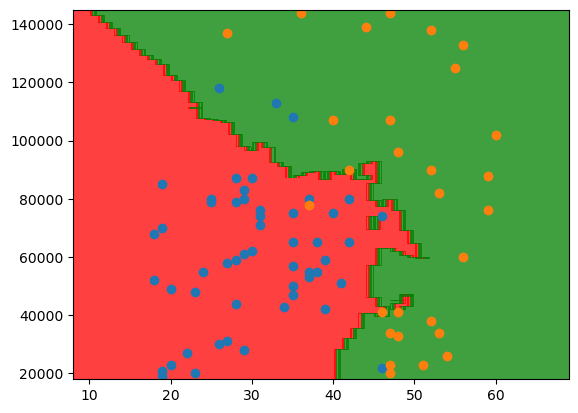

In [5]:
# test
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10,
                               stop=X_set[:, 0].max() + 10, step=1),
                    np.arange(start=X_set[:, 1].min() - 1000,
                               stop=X_set[:, 1].max() + 1000, step=1))
plt.contourf(X1, X2, 
             classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
               cmap=ListedColormap(('red', 'green'))(i), label=j)

In [6]:
# svm = support vector machine , line (hyperplane) - max margin
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=42) # linearly separable
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[50  2]
 [ 9 19]]
0.8625


/var/folders/kv/fvbwb5yj4_751vw_l_kg15qm0000gn/T/ipykernel_14059/3792286664.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


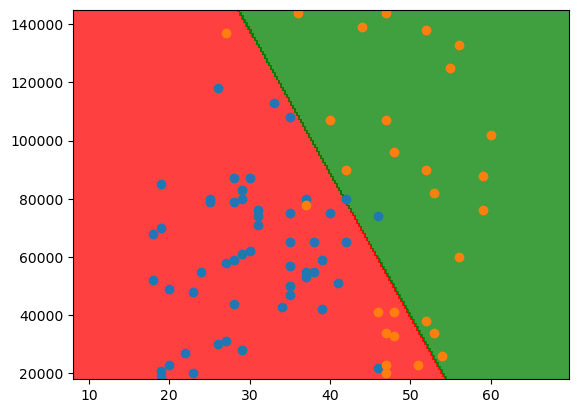

In [7]:
# test
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10,
                               stop=X_set[:, 0].max() + 10, step=0.25),
                    np.arange(start=X_set[:, 1].min() - 1000,
                               stop=X_set[:, 1].max() + 1000, step=0.25))
plt.contourf(X1, X2, 
             classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
               cmap=ListedColormap(('red', 'green'))(i), label=j)

In [8]:
# kernel svm
# mapping func , mapping to higher dim to use a linear line for separation
# 2d space -> 3d space, to use hyperplane for separation
# highly computation intensive so this approach is not the best
# kernel trick , gaussian rbf kernel
# landmark is placed , take inner class put it into circumference
# sigmoid kernel, polynomial kernel
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[47  5]
 [ 1 27]]
0.925


/var/folders/kv/fvbwb5yj4_751vw_l_kg15qm0000gn/T/ipykernel_14059/3792286664.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


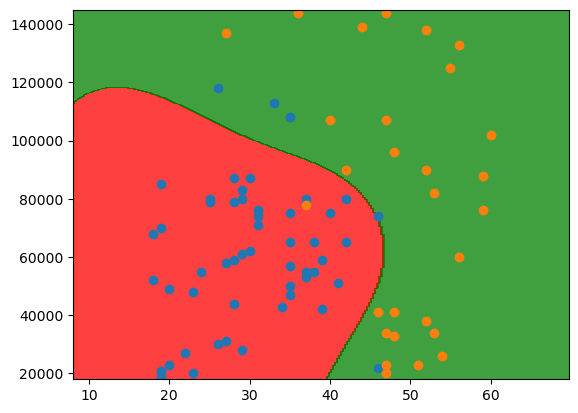

In [9]:
# test
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10,
                               stop=X_set[:, 0].max() + 10, step=0.25),
                    np.arange(start=X_set[:, 1].min() - 1000,
                               stop=X_set[:, 1].max() + 1000, step=0.25))
plt.contourf(X1, X2, 
             classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
               cmap=ListedColormap(('red', 'green'))(i), label=j)

In [10]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[50  2]
 [ 3 25]]
0.9375


/var/folders/kv/fvbwb5yj4_751vw_l_kg15qm0000gn/T/ipykernel_14059/3792286664.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


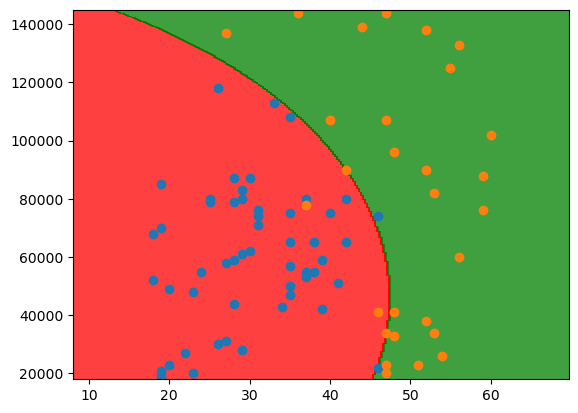

In [11]:
# test
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10,
                               stop=X_set[:, 0].max() + 10, step=0.25),
                    np.arange(start=X_set[:, 1].min() - 1000,
                               stop=X_set[:, 1].max() + 1000, step=0.25))
plt.contourf(X1, X2, 
             classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
               cmap=ListedColormap(('red', 'green'))(i), label=j)

In [12]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
#classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[46  6]
 [ 7 21]]
0.8375


/var/folders/kv/fvbwb5yj4_751vw_l_kg15qm0000gn/T/ipykernel_14059/3792286664.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


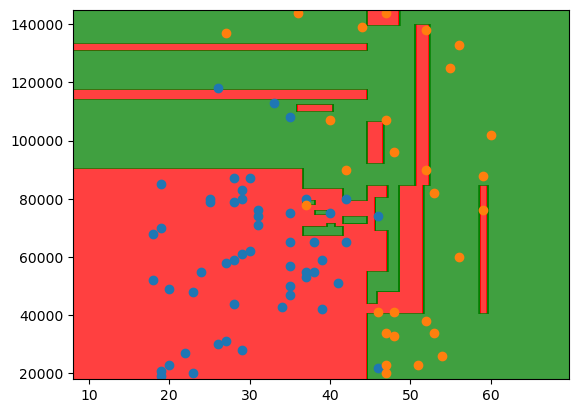

In [13]:
# test
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10,
                               stop=X_set[:, 0].max() + 10, step=0.25),
                    np.arange(start=X_set[:, 1].min() - 1000,
                               stop=X_set[:, 1].max() + 1000, step=0.25))
plt.contourf(X1, X2, 
             classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
               cmap=ListedColormap(('red', 'green'))(i), label=j)

In [14]:
# random forest - ensemble learning
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[46  6]
 [ 3 25]]
0.8875


/var/folders/kv/fvbwb5yj4_751vw_l_kg15qm0000gn/T/ipykernel_14059/3792286664.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


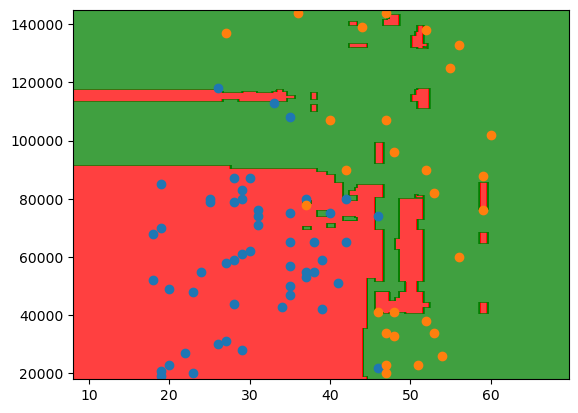

In [15]:
# test
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10,
                               stop=X_set[:, 0].max() + 10, step=0.25),
                    np.arange(start=X_set[:, 1].min() - 1000,
                               stop=X_set[:, 1].max() + 1000, step=0.25))
plt.contourf(X1, X2, 
             classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
               cmap=ListedColormap(('red', 'green'))(i), label=j)